In [66]:
# importing all necessary libraries

#basic libraries
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

#for dataset processing and encoding
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# for training
from sklearn.linear_model import LogisticRegression

# for metric score
from sklearn.metrics import accuracy_score


import pickle

In [67]:
# Data preprocessing

file_path = r'main_dataset_fcd.txt'
df = pd.read_csv(file_path, sep='\t', names=['type','clue'], on_bad_lines='skip')
df = df[df['type'].isin(['normal', 'fraud'])]
df = df.sample(frac=1, random_state=42)

In [68]:
df['type'].value_counts()

type
normal    5461
fraud      989
Name: count, dtype: int64

Text(0, 0.5, 'count')

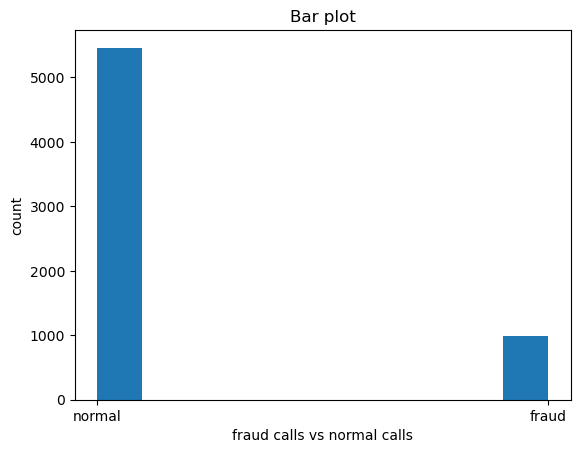

In [69]:
# Data Viewing

plt.hist(df['type'])
plt.title("Bar plot")
plt.xlabel("fraud calls vs normal calls")
plt.ylabel("count")

In [70]:
# Label Encoding
df['type'].replace(["fraud","normal"],[1,0],inplace=True)

# Using Vectorizer for better word encoding
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['clue'])
Y = df['type']

C:\Users\allmi\AppData\Local\Temp\ipykernel_34908\211522868.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['type'].replace(["fraud","normal"],[1,0],inplace=True)
C:\Users\allmi\AppData\Local\Temp\ipykernel_34908\211522868.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['type'].replace

In [71]:
#analysing imp word

important_words = vectorizer.get_feature_names_out()
print(important_words)

['000' '08000839402' '08000930705' '10' '100' '1000' '10p' '11' '12' '150'
 '150p' '150ppm' '16' '18' '1st' '200' '2000' '250' '2nd' '30' '350' '50'
 '500' '5000' '750' '800' '8007' '86688' '87066' 'aadhar' 'able' 'about'
 'abt' 'access' 'account' 'action' 'activate' 'activity' 'actually'
 'address' 'aft' 'after' 'afternoon' 'again' 'ago' 'ah' 'ahead' 'aight'
 'airport' 'all' 'almost' 'alone' 'already' 'alright' 'also' 'always' 'am'
 'amazing' 'amazon' 'amount' 'amp' 'an' 'and' 'angry' 'another' 'answer'
 'any' 'anyone' 'anything' 'anytime' 'anyway' 'application' 'apply'
 'approved' 'ard' 'are' 'around' 'as' 'ask' 'asked' 'asking' 'ass' 'at'
 'atm' 'attempt' 'available' 'avoid' 'await' 'award' 'awarded' 'away'
 'awesome' 'babe' 'baby' 'back' 'bad' 'balance' 'bank' 'banking' 'be'
 'beautiful' 'because' 'become' 'bed' 'been' 'before' 'being' 'believe'
 'best' 'better' 'between' 'big' 'bill' 'birthday' 'bit' 'blocked' 'blood'
 'blue' 'bonus' 'book' 'books' 'bored' 'both' 'bout' 'box' 'boy

In [72]:
#Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [73]:
# Training Model
model = LogisticRegression(C=10)
model.fit(X_train, Y_train)

#Evaluating the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy*100, "%")

Accuracy: 98.68217054263566 %


In [74]:
# Saving Model
with open(r'trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)

#Saving Vectorizer
with open(r'vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

In [75]:
# Testing

with open(r'trained_model.pkl', 'rb') as file:
    model = pickle.load(file)

text="hello i am manager speaking, give me the bank details"

text_to_predict = vectorizer.transform([text])
prediction = model.predict(text_to_predict)
if prediction[0] == 1:
    print("Prediction: Fraudulent call")
else:
    print("Prediction: Normal call")

Prediction: Fraudulent call


In [25]:
# THE END OF THE MODEL TRAINING PART